In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from collections import Counter


In [2]:
file = ("StartupInvestments.csv")
file1 = ("locations.csv")
df = pd.read_csv(file, encoding="ISO-8859-1")
df1=pd.read_csv(file1)
df.head(1)

,Unnamed: 0,Company Name,Total Raised_x,Year Founded_x,# Active Investors_x,Growth Rate_x,Growth Rate Percentile_x,Web Growth Rate_x,Web Growth Rate Percentile_x,Social Growth Rate_x,...,HQ Location,HQ Country,HQ Global Region,Active Investors,First Financing Date,First Financing Deal Type,First Financing Deal Class,Last Financing Date,Last Financing Deal Type,Last Financing Deal Class
0,0,3D Hubs,29.52,2013.0,11.0,0.08,89.0,0.12,94.0,0.05,...,"Amsterdam, Netherlands",Netherlands,Europe,"Arthur Kosten, Balderton Capital, Endeit Capit...",2013-04-01,Accelerator/Incubator,Other,2019-03-26,Later Stage VC,Venture Capital


In [3]:
df.rename(columns = {'HQ Location': 'location'}, inplace=True)
df.count()

Unnamed: 0                          397
Company Name                        397
Total Raised_x                      397
Year Founded_x                      397
# Active Investors_x                397
Growth Rate_x                       397
Growth Rate Percentile_x            397
Web Growth Rate_x                   397
Web Growth Rate Percentile_x        397
Social Growth Rate_x                397
Social Growth Rate Percentile_x     397
Twitter Growth Rate_x               397
Twitter Growth Rate Percentile_x    397
Twitter Followers_x                 397
Last Financing Size_x               397
First Financing Size_x              397
Programming Languages               397
Software Applications               397
Primary Industry Code               397
Primary Industry Sector             397
Primary Industry Group              397
Verticals                           397
location                            397
HQ Country                          397
HQ Global Region                    397


In [4]:
#Separate the locations into City and States
df2 = df.copy()
col = ["location"]
df_data = df2[col]
df_data[['City','State']] = df_data.location.str.split(",",expand=True,)
df_data

C:\Users\subil\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\frame.py:3494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self[k1] = value[k2]


,location,City,State
0,"Amsterdam, Netherlands",Amsterdam,Netherlands
1,"San Mateo, CA",San Mateo,CA
2,"Los Angeles, CA",Los Angeles,CA
3,"Boston, MA",Boston,MA
4,"Oakland, CA",Oakland,CA
...,...,...,...
392,"Wilmington, NC",Wilmington,NC
393,"Tokyo, Japan",Tokyo,Japan
394,"Palo Alto, CA",Palo Alto,CA
395,"Santa Monica, CA",Santa Monica,CA


In [5]:
#Look if there's any columns from 'State' empty
df_data.loc[ df_data.isnull().any(axis=1)]

,location,City,State
177,CA,CA,None


In [6]:
#Fill the empty cell
df_data['State'].fillna('CA', inplace=True)

C:\Users\subil\AppData\Local\Continuum\anaconda3\lib\site-packages\pandas\core\generic.py:6287: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._update_inplace(new_data)


In [7]:
#Count how many startups each State has
results = Counter(" ".join(df_data['State'].values.tolist()).split(" ")).items()
results

dict_items([('', 396), ('Netherlands', 1), ('CA', 182), ('MA', 30), ('IL', 8), ('PA', 6), ('France', 3), ('MO', 2), ('NC', 6), ('Canada', 10), ('TX', 14), ('WA', 8), ('NY', 41), ('DC', 3), ('Switzerland', 5), ('OR', 1), ('Israel', 12), ('United', 8), ('Kingdom', 8), ('Germany', 5), ('Spain', 3), ('GA', 4), ('Singapore', 1), ('MD', 3), ('VA', 5), ('India', 4), ('MN', 1), ('UT', 3), ('CO', 5), ('OH', 1), ('Japan', 6), ('AZ', 1), ('Ireland', 1), ('NJ', 1), ('Belgium', 1), ('MI', 3), ('Uganda', 1), ('China', 1), ('IN', 3), ('Taiwan', 1), ('Portugal', 1), ('Sweden', 1), ('CT', 1)])

In [8]:
#Get the 4 biggest States with Startup
map_df = pd.DataFrame(results, columns=['State','amount'])
map_data = map_df.nlargest(5,['amount'])
map_data

,State,amount
0,,396
2,CA,182
12,NY,41
3,MA,30
10,TX,14


In [9]:
#Drop the first line, it's the total and I don't need it
map_data.drop([0], inplace=True)
map_data

,State,amount
2,CA,182
12,NY,41
3,MA,30
10,TX,14


In [10]:
#Create a csv file with the 4 biggest States
map_data.to_csv('state.csv', index=False)

In [11]:

df['HQ Country'] = df["HQ Country"].str.replace(" ","")
result = Counter(" ".join(df['HQ Country'].values.tolist()).split(" ")).items()
result

dict_items([('Netherlands', 1), ('UnitedStates', 332), ('France', 3), ('Canada', 10), ('Switzerland', 5), ('Israel', 12), ('UnitedKingdom', 8), ('Germany', 5), ('Spain', 3), ('Singapore', 1), ('India', 4), ('Japan', 6), ('Ireland', 1), ('Belgium', 1), ('Uganda', 1), ('China', 1), ('Taiwan', 1), ('Portugal', 1), ('Sweden', 1)])

In [12]:
df['Primary Industry Sector'] = df["Primary Industry Sector"].str.replace(" ","")
result = Counter(" ".join(df['Primary Industry Sector'].values.tolist()).split(" ")).items()
result

dict_items([('BusinessProductsandServices(B2B)', 63), ('InformationTechnology', 230), ('ConsumerProductsandServices(B2C)', 66), ('Healthcare', 15), ('Energy', 15), ('MaterialsandResources', 2), ('FinancialServices', 6)])

In [13]:
sector_df = pd.DataFrame(result, columns=['sector', 'number'])
sector_df

,sector,number
0,BusinessProductsandServices(B2B),63
1,InformationTechnology,230
2,ConsumerProductsandServices(B2C),66
3,Healthcare,15
4,Energy,15
5,MaterialsandResources,2
6,FinancialServices,6


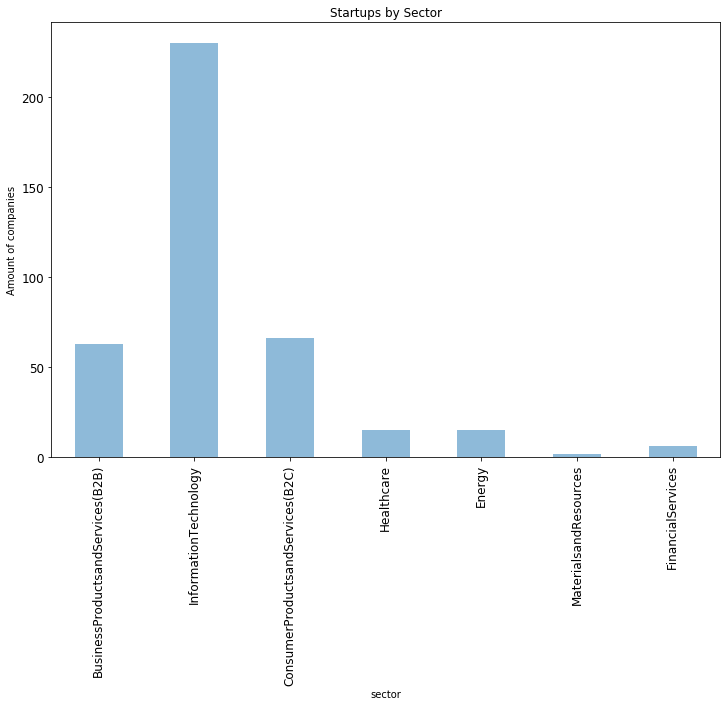

In [15]:
sector_df.plot(kind='bar',  x='sector', y='number', title ="Startups by Sector",figsize=(12, 8), legend=None, fontsize=12, alpha = 0.5)
#plt.xticks(sector_df['sector'])
plt.ylabel('Amount of companies')
plt.show()